In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
df=pd.read_excel("/content/drive/MyDrive/Excelr/Assignments/DataSets/EastWestAirlines.xlsx",sheet_name=1)

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


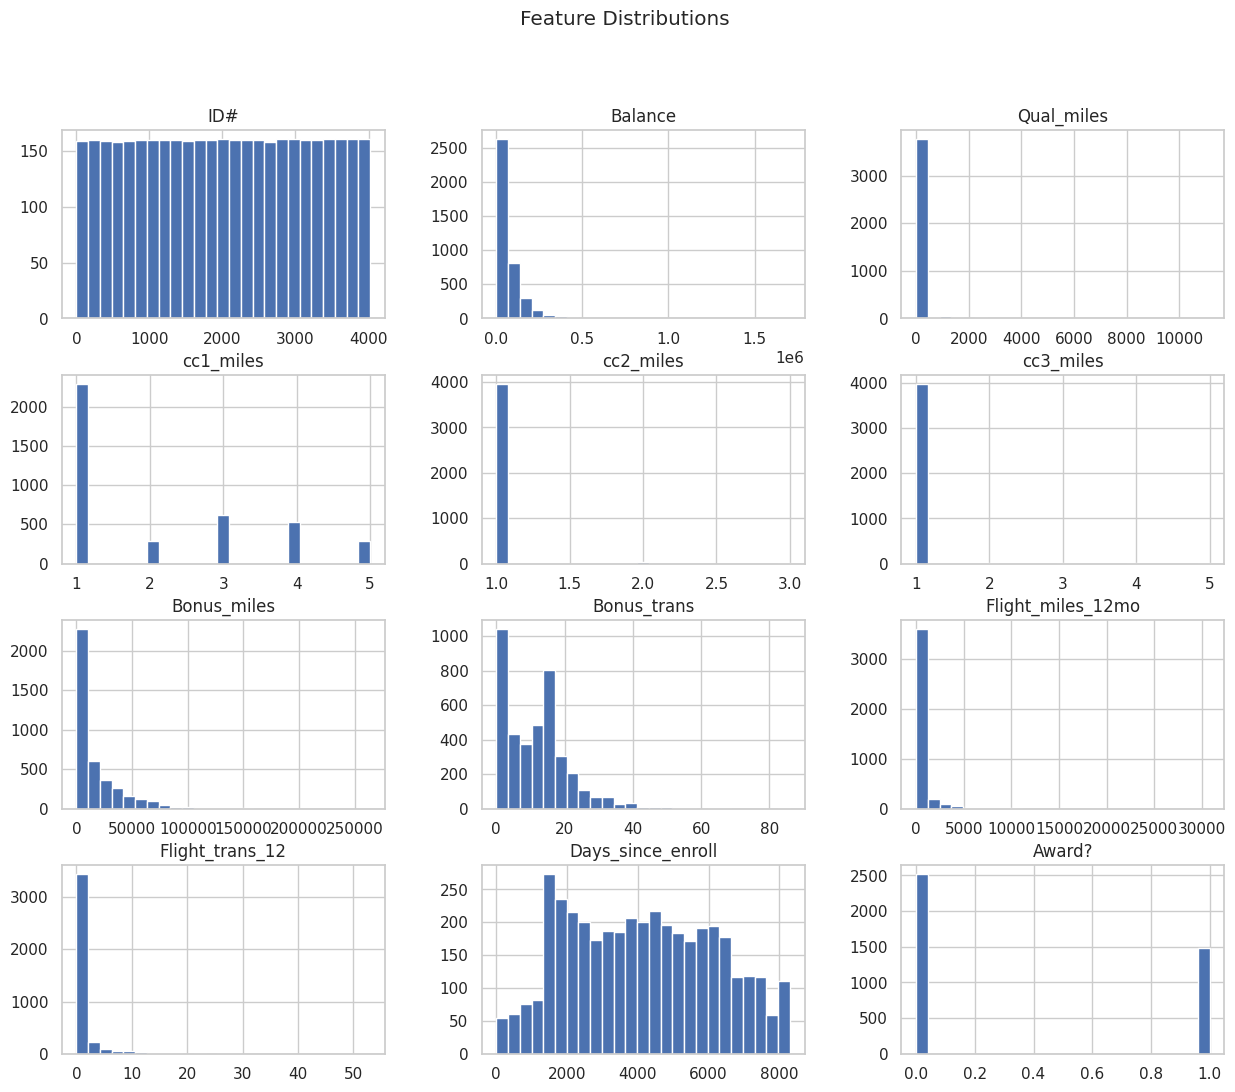

In [8]:
# Histograms
df.hist(bins=25, figsize=(15, 12))
plt.suptitle("Feature Distributions")
plt.show()

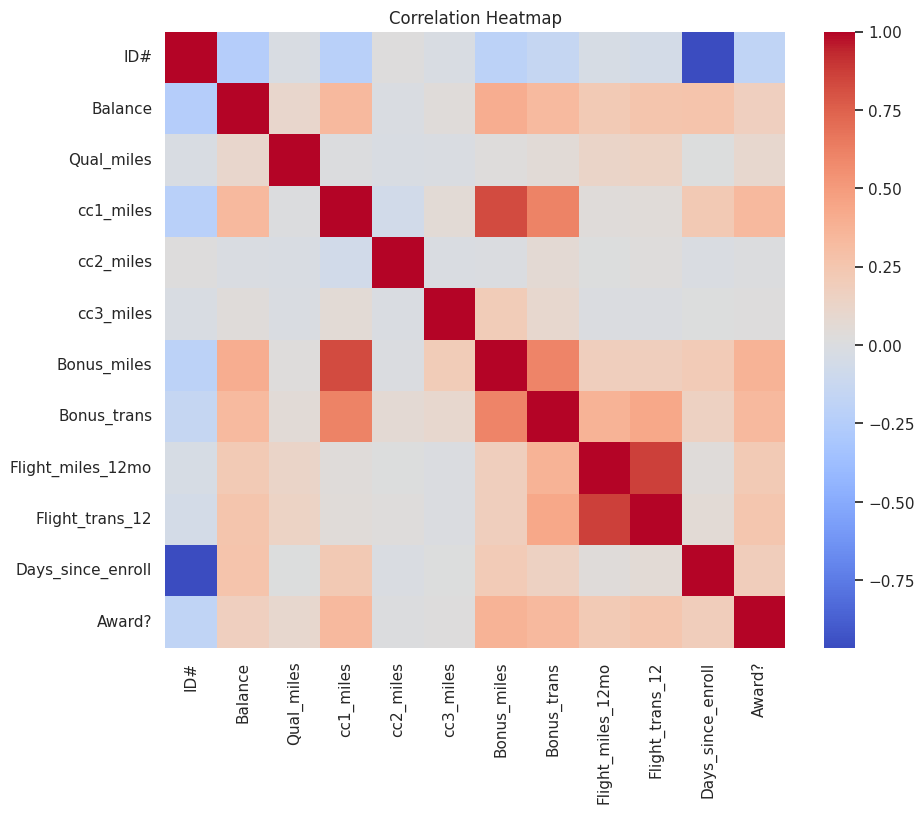

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Drop ID
id_cols = [c for c in df.columns if "id" in c.lower()]
if id_cols:
    df = df.drop(columns=id_cols)


In [11]:
# Drop target column
if "Award?" in df.columns:
    df = df.drop(columns=["Award?"])



In [13]:
# Impute missing values
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

In [21]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Variance explained by 2 PCs:", pca.explained_variance_ratio_.sum())


Variance explained by 2 PCs: 0.47775225096367857


In [22]:
inertias, sil_scores = [], []
k_range = range(2, 11)



In [23]:

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))


Text(0.5, 0, 'k')

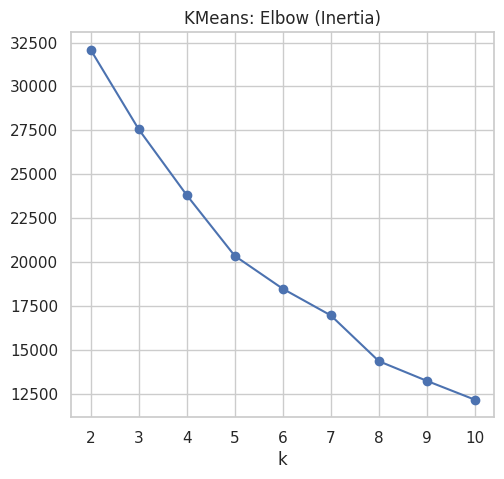

In [24]:
# Elbow & silhouette plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title("KMeans: Elbow (Inertia)")
plt.xlabel("k")


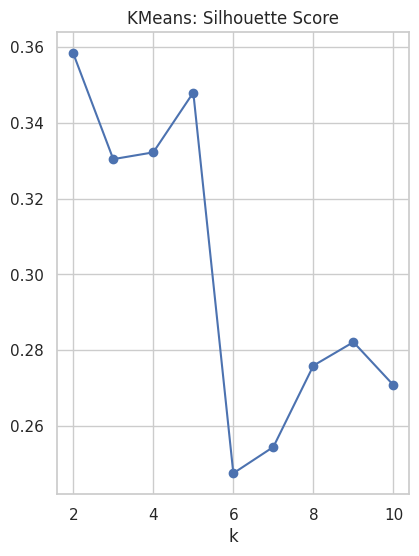

In [25]:

plt.subplot(1,2,2)
plt.plot(k_range, sil_scores, marker='o')
plt.title("KMeans: Silhouette Score")
plt.xlabel("k")
plt.show()


In [26]:
# Choose best k by silhouette
best_k = k_range[np.argmax(sil_scores)]
print("Best k by silhouette:", best_k)


Best k by silhouette: 2


In [27]:
# Final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
km_labels = kmeans.fit_predict(X_scaled)


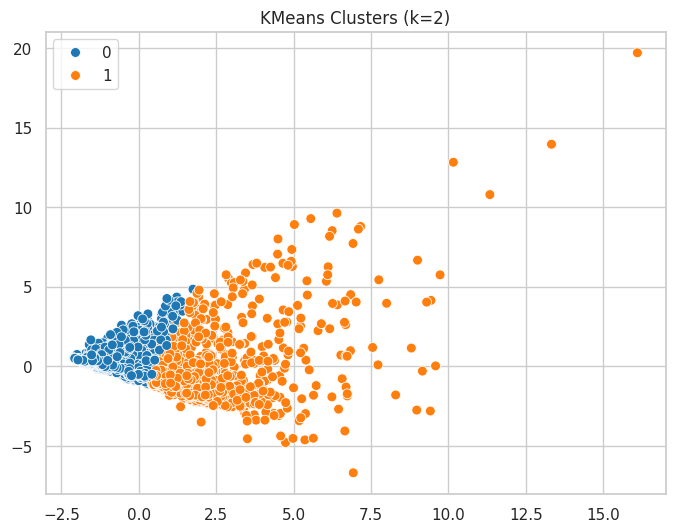

In [28]:
# PCA visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=km_labels, palette="tab10", s=50)
plt.title(f"KMeans Clusters (k={best_k})")
plt.show()


--- WARD linkage ---
Clusters=2, Silhouette=0.3251
Clusters=3, Silhouette=0.3162
Clusters=4, Silhouette=0.3350
Clusters=5, Silhouette=0.3270


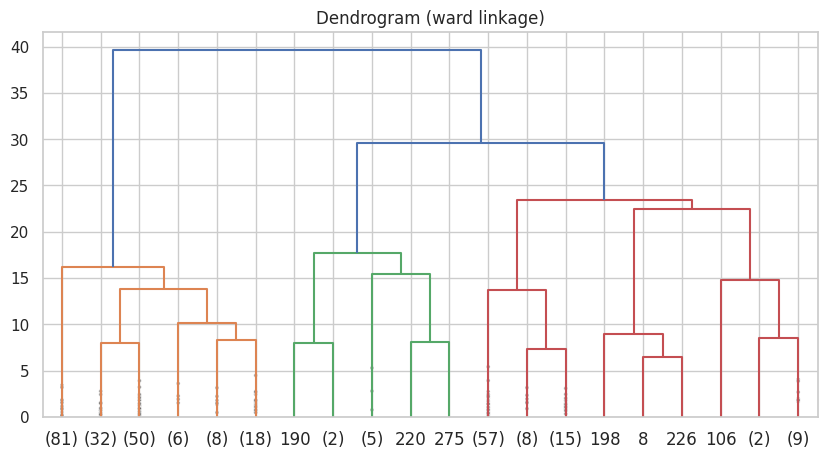


--- COMPLETE linkage ---
Clusters=2, Silhouette=0.8257
Clusters=3, Silhouette=0.7939
Clusters=4, Silhouette=0.6660
Clusters=5, Silhouette=0.6642


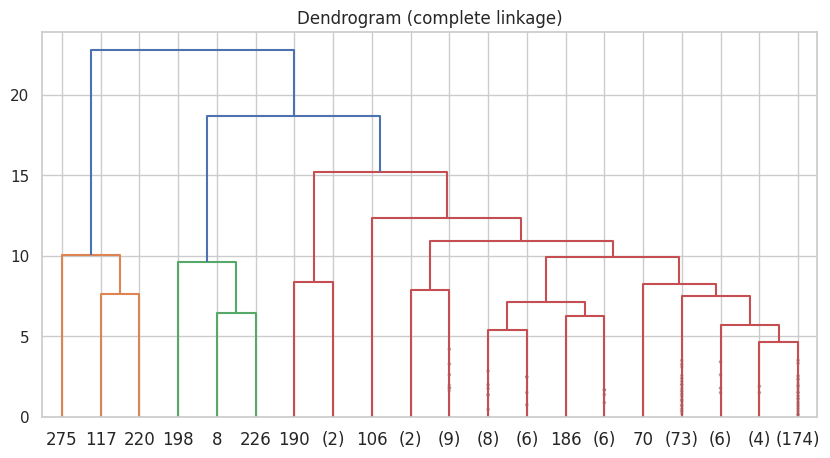


--- AVERAGE linkage ---
Clusters=2, Silhouette=0.8257
Clusters=3, Silhouette=0.8004
Clusters=4, Silhouette=0.7910
Clusters=5, Silhouette=0.7880


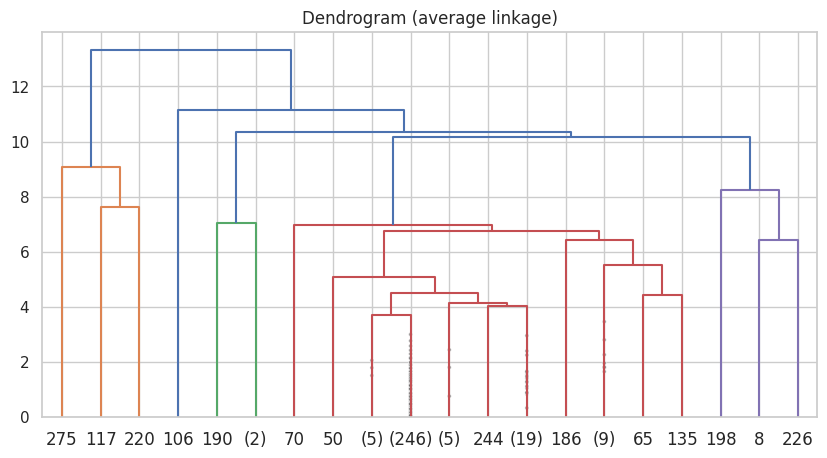


--- SINGLE linkage ---
Clusters=2, Silhouette=0.8674
Clusters=3, Silhouette=0.7559
Clusters=4, Silhouette=0.5721
Clusters=5, Silhouette=0.5720


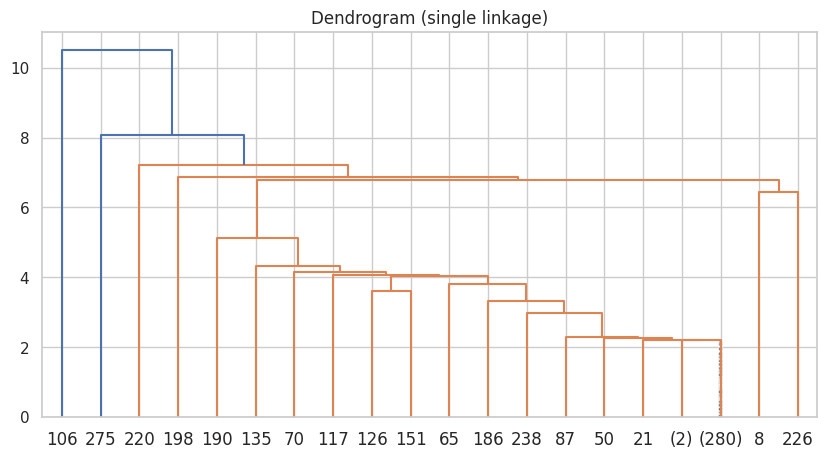

In [29]:
linkage_methods = ["ward", "complete", "average", "single"]

for method in linkage_methods:
    print(f"\n--- {method.upper()} linkage ---")
    for n_clusters in range(2, 6):
        hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        labels = hc.fit_predict(X_scaled)
        sil = silhouette_score(X_scaled, labels)
        print(f"Clusters={n_clusters}, Silhouette={sil:.4f}")


    sample_size = min(300, len(X_scaled))
    Z = linkage(X_scaled[:sample_size], method=method)
    plt.figure(figsize=(10,5))
    dendrogram(Z, truncate_mode="lastp", p=20, show_contracted=True)
    plt.title(f"Dendrogram ({method} linkage)")
    plt.show()


In [30]:
# 8. DBSCAN with k-distance plot

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)



In [31]:
distances = np.sort(distances[:, k-1])


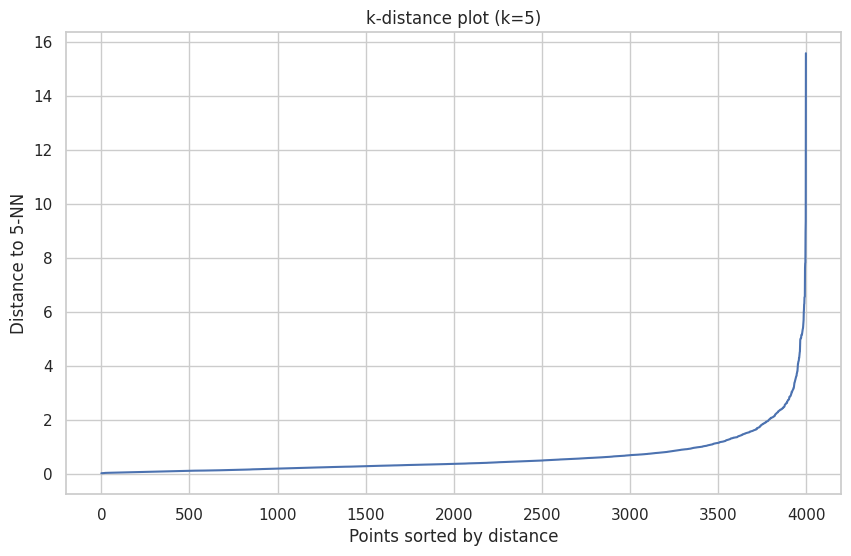

In [32]:
plt.plot(distances)
plt.title(f"k-distance plot (k={k})")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to {}-NN".format(k))
plt.grid(True)
plt.show()

In [33]:
# 9. DBSCAN Final Run

chosen_eps = 1.5
chosen_min_samples = 5

In [34]:
db = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
db_labels = db.fit_predict(X_scaled)


In [35]:
print("Unique labels:", np.unique(db_labels))
if len(set(db_labels)) > 1:
    print("Silhouette:", silhouette_score(X_scaled, db_labels))


Unique labels: [-1  0  1  2  3]
Silhouette: 0.5676389056959055


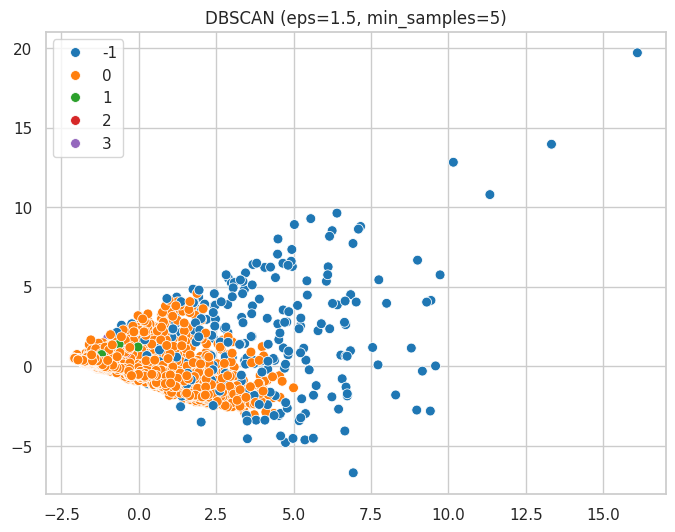

In [36]:
# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_labels, palette="tab10", s=50)
plt.title(f"DBSCAN (eps={chosen_eps}, min_samples={chosen_min_samples})")
plt.show()

In [38]:

print("KMeans best k:", best_k, "silhouette:", max(sil_scores))
print("DBSCAN clusters:", len(set(db_labels)) - (1 if -1 in db_labels else 0))


KMeans best k: 2 silhouette: 0.35826638416515033
DBSCAN clusters: 4



**Interpretation** :
- KMeans gives spherical clusters and works well when clusters are balanced.
- Hierarchical clustering shows how clusters merge/split with different linkages.
- DBSCAN is density-based: it finds arbitrary-shaped clusters and marks noise (-1).
- Use silhouette + business interpretation to decide best method.
